<a href="https://colab.research.google.com/github/rubenguerra/datascience/blob/master/clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

BAJAMOS EL DATASET

In [3]:
CSV_COLUMN_NAMES = ['Largo_sepalo', 'Ancho_sepalo', 'Largo_Petalo', 'Ancho_Petalo', 'Especie']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [4]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

dataset=read_csv(url, names=CSV_COLUMN_NAMES)


In [5]:
print(dataset.shape)

(150, 5)


In [7]:
dataset.head(20)

,Largo_sepalo,Ancho_sepalo,Largo_Petalo,Ancho_Petalo,Especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
#Descripciones
print(dataset.describe())

       Largo_sepalo  Ancho_sepalo  Largo_Petalo  Ancho_Petalo
count    150.000000    150.000000    150.000000    150.000000
mean       5.843333      3.054000      3.758667      1.198667
std        0.828066      0.433594      1.764420      0.763161
min        4.300000      2.000000      1.000000      0.100000
25%        5.100000      2.800000      1.600000      0.300000
50%        5.800000      3.000000      4.350000      1.300000
75%        6.400000      3.300000      5.100000      1.800000
max        7.900000      4.400000      6.900000      2.500000


In [11]:
#Distribucion de clases
print(dataset.groupby('Especie').size())

Especie
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


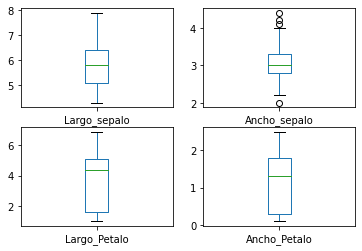

In [12]:
#Grafico de caja
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

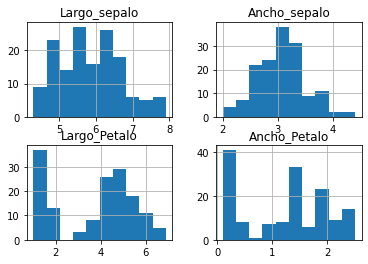

In [13]:
#Creamos un histograma
dataset.hist()
pyplot.show()

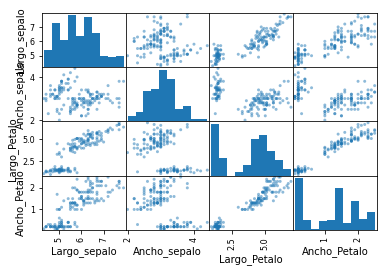

In [14]:
#Un grafico multivariado
scatter_matrix(dataset)
pyplot.show()

In [15]:
#Separamos los datos de validacion del dataset
array= dataset.values
x=array[:,0:4]
y=array[:,4]

x_train, x_validation, y_train, y_validation=train_test_split(x, y, test_size=0.20, random_state=1)

In [17]:
#Como seleccionar el mejor algoritmo para construir el modelo de red neuronal

modelos=[]
modelos.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC(gamma='auto')))

#Se evalua cada modelo por turno

resultados=[]
nombres=[]
for nombre, modelo in modelos:
  kfold=StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
  cv_results=cross_val_score(modelo, x_train, y_train, cv=kfold, scoring='accuracy')
  resultados.append(cv_results)
  nombres.append(nombre)
  print('%s: %f (%f)'% (nombre, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


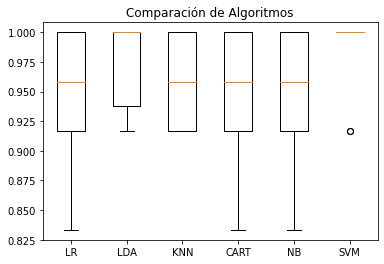

In [18]:
#Comparación de algoritmos
pyplot.boxplot(resultados, labels=nombres)
pyplot.title('Comparación de Algoritmos')
pyplot.show()

In [19]:
#Hacer predicciones con el dataset de validación
modelo=SVC(gamma='auto')
modelo.fit(x_train, y_train)
prediccion=modelo.predict(x_validation)

In [20]:
#Evaluar la prediccion
print(accuracy_score(y_validation, prediccion))
print(confusion_matrix(y_validation, prediccion))
print(classification_report(y_validation, prediccion))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



##Usando otros metodo

In [ ]:
train_path = tf.keras.utils.get_file('iris_training.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv')
test_path = tf.keras.utils.get_file('iris_test.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv')

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [ ]:
train.head()

,Largo_sepalo,Ancho_sepalo,Largo_Petalo,Ancho_Petalo,Especie
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
train_y = train.pop('Especie')
test_y = test.pop('Especie')


In [ ]:
train.head()

,Largo_sepalo,Ancho_sepalo,Largo_Petalo,Ancho_Petalo
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [ ]:
test.head()

,Largo_sepalo,Ancho_sepalo,Largo_Petalo,Ancho_Petalo
0,5.9,3.0,4.2,1.5
1,6.9,3.1,5.4,2.1
2,5.1,3.3,1.7,0.5
3,6.0,3.4,4.5,1.6
4,5.5,2.5,4.0,1.3


In [ ]:
train.shape

(120, 4)

In [ ]:
test.shape

(30, 4)

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):
  dataset=tf.data.Dataset.from_tensor_slices((dict(features),labels))
  if training:
    dataset= dataset.shuffle(1000).repeat()
  return dataset.batch(batch_size)

In [ ]:
my_feature_columns=[]

for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='Largo_sepalo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Ancho_sepalo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Largo_Petalo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Ancho_Petalo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


CONSTRUIMOS UN MODELO DDN CON 2 CAPAS OCULTAS DE 30 Y 10 NODOS RESPECTIVAMENTE

In [ ]:
clasificador=tf.estimator.DNNClassifier(feature_columns=my_feature_columns, hidden_units=[30,10], n_classes=3)
#EL modelo debe escoger entre 3 clases de flores

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp98lt825t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
clasificador.train(input_fn=lambda: input_fn(train,train_y,training=True),steps=5000)

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling 